# word2vec

Ten notatnik ma na celu przedstawienie sposobu tworzenia i wykorzystania reprezentacji werktorowych na przykładzie algorytmu word2vec. W trakcie zadania najpierw stworzymy prostą reprezentację wektorową, a następnie spróbujemy wczytać gotowy model nauczony na dużym korpusie tekstowym.

Po wykonaniu tego zadania powinieneś:
+ wiedzieć na czym polega word2vec,
+ potrafić stworzyć word2vec na własnych danych,
+ potrafić wykorzystać word2vec do:
	+ znalezienia podobnych słów,
	+ wyszukiwania słów na zasadzie "reguły trzech", 
	+ wykrywania niepasujących słów,
	+ do tworzenia wektora cech nadającego się do klasyfikacji,
+ wczytać i wykorzystać gotowy model.

## Prosty model

Najpierw wczytamy odpowiednie biblioteki i stworzymy mały zbiór treningowy na podstawie znanej piosenki.

In [1]:
import gensim, logging, re, nltk
import pandas as pd

RE_SPACES = re.compile("\s+")
RE_HASHTAG = re.compile("[@#][_a-z0-9]+")
RE_EMOTICONS = re.compile("(:-?\))|(:p)|(:d+)|(:-?\()|(:/)|(;-?\))|(<3)|(=\))|(\)-?:)|(:'\()|(8\))")
RE_HTTP = re.compile("http(s)?://[/\.a-z0-9]+")

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
 
song = """Gdzie strumyk płynie z wolna,
Rozsiewa zioła maj,
Stokrotka rosła polna,
A nad nią szumiał gaj,
Stokrotka rosła polna,
A nad nią szumiał gaj,
Zielony gaj.

W tym gaju tak ponuro,
Że aż przeraża mnie,
Ptaszęta za wysoko,
A mnie samotnej źle,
Ptaszęta za wysoko,
A mnie samotnej źle,
samotnej źle.

Wtem harcerz idzie z wolna.
„Stokrotko, witam cię,
Twój urok mnie zachwyca,
Czy chcesz być mą, czy nie?”
"Twój urok mnie zachwyca,
Czy chcesz być mą, czy nie?
Czy nie, czy nie?

Stokrotka się zgodziła
I poszli w ciemny las,
A harcerz taki gapa
że aż w pokrzywy wlazł,
A harcerz taki gapa
że aż w pokrzywy wlazł,
w pokrzywy wlazł.

A ona, ona, ona,
Cóż biedna robić ma,
Nad gapą pochylona
I śmieje się: ha, ha,
Nad gapą pochylona
I śmieje: się ha, ha,
ha, ha, ha, ha."""

**Zad. 1: Podziel piosenkę na wersy, a wersy tokenizuj spacjami. W efekcie powinieneś stworzyć listę list i przypisać ją do zmiennej `sentences`.**

In [2]:
sentences = [RE_SPACES.split(paragraph) for paragraph in song.split('\n')]
print(sentences)

[['Gdzie', 'strumyk', 'płynie', 'z', 'wolna,'], ['Rozsiewa', 'zioła', 'maj,'], ['Stokrotka', 'rosła', 'polna,'], ['A', 'nad', 'nią', 'szumiał', 'gaj,'], ['Stokrotka', 'rosła', 'polna,'], ['A', 'nad', 'nią', 'szumiał', 'gaj,'], ['Zielony', 'gaj.'], [''], ['W', 'tym', 'gaju', 'tak', 'ponuro,'], ['Że', 'aż', 'przeraża', 'mnie,'], ['Ptaszęta', 'za', 'wysoko,'], ['A', 'mnie', 'samotnej', 'źle,'], ['Ptaszęta', 'za', 'wysoko,'], ['A', 'mnie', 'samotnej', 'źle,'], ['samotnej', 'źle.'], [''], ['Wtem', 'harcerz', 'idzie', 'z', 'wolna.'], ['„Stokrotko,', 'witam', 'cię,'], ['Twój', 'urok', 'mnie', 'zachwyca,'], ['Czy', 'chcesz', 'być', 'mą,', 'czy', 'nie?”'], ['"Twój', 'urok', 'mnie', 'zachwyca,'], ['Czy', 'chcesz', 'być', 'mą,', 'czy', 'nie?'], ['Czy', 'nie,', 'czy', 'nie?'], [''], ['Stokrotka', 'się', 'zgodziła'], ['I', 'poszli', 'w', 'ciemny', 'las,'], ['A', 'harcerz', 'taki', 'gapa'], ['że', 'aż', 'w', 'pokrzywy', 'wlazł,'], ['A', 'harcerz', 'taki', 'gapa'], ['że', 'aż', 'w', 'pokrzywy', 'wlaz

Mając tekst podzielony na zdania a zdania na tokeny, możemy nauczyć model word2vec.

**Zad. 2: Naucz model word2vec. [Sprawdź](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec) za co odpowiedzialne są parametry `min_count` i `iter`. Jakie inne parametry mogą być przydatne?**

* min_count - ignoruje wszystkie słowa, które występują rzadziej niż min_count
* iter - liczba iteracji po korpusie.

In [3]:
model = gensim.models.Word2Vec(sentences, iter=5, min_count=1)
print(model)
print(model.vocabulary)

model.wv.doesnt_match("las harcerz gaj zioła".split())

2021-01-17 22:31:08,975 : INFO : collecting all words and their counts
2021-01-17 22:31:08,977 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-01-17 22:31:08,979 : INFO : collected 80 word types from a corpus of 144 raw words and 39 sentences
2021-01-17 22:31:08,980 : INFO : Loading a fresh vocabulary
2021-01-17 22:31:08,982 : INFO : effective_min_count=1 retains 80 unique words (100% of original 80, drops 0)
2021-01-17 22:31:08,985 : INFO : effective_min_count=1 leaves 144 word corpus (100% of original 144, drops 0)
2021-01-17 22:31:08,988 : INFO : deleting the raw counts dictionary of 80 items
2021-01-17 22:31:08,989 : INFO : sample=0.001 downsamples 80 most-common words
2021-01-17 22:31:08,992 : INFO : downsampling leaves estimated 50 word corpus (35.2% of prior 144)
2021-01-17 22:31:08,993 : INFO : estimated required memory for 80 words and 100 dimensions: 104000 bytes
2021-01-17 22:31:08,995 : INFO : resetting layer weights
2021-01-17 22:31:09,037 :

Word2Vec(vocab=80, size=100, alpha=0.025)


/home/bartmiki/Repo/EMD/venv/lib/python3.6/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'harcerz'

Model jest niezwykle mały i niezbyt praktyczny, ale pozwolił pokazać podstawę uczenia word2vec. Przy większych korpusach tekstowych wczytywanie do pamięci wielkich tablic nie byłoby najlepszym pomysłem. Na szczęście implementacja word2vec w gensim potrafi przetwarzać dane przyrostowo.

## Przetwarzanie strumieniowe

Zamiast wczytywać wszystkie dokumenty naraz można robić to partiami, bo sieci neuronowe (w tym word2vec) potrafią douczać się przyrostowo. Do douczania przyrostowego świetnie nada się pythonowy iterator lub generator. Jeśli nie kojarzysz na czym polega działanie iteratorów i generatorów, zobacz jak [wyjaśnia to Radim Rehurek](https://rare-technologies.com/data-streaming-in-python-generators-iterators-iterables/).

Zasymulujmy zdania/wersy/tweety przechowywane w osobnych plikach.

In [4]:
import smart_open, os

if not os.path.exists('./data/'):
    os.makedirs('./data/')

filenames = ['./data/f' + str(i) +'.txt' for i in range(39)]

if sentences is not None:
    for i, fname in enumerate(filenames):
        with smart_open.smart_open(fname, 'w') as fout:
            for line in sentences[i]:
                fout.write(line + ' ')

**Zad. 3: Mając powyższy zbiór dokumentów tekstowych, stwórz metodę która będzie "leniwie" iterowała przez zasymulowany zbiór danych. Podczas iterowania usuń znaki interpunkcyjne i zmień wszystkie litery na małe.**

In [5]:
import string
punctuation = set(string.punctuation)

class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            if fname.endswith('.txt'):
                for line in open(os.path.join(self.dirname, fname)):
                    yield RE_SPACES.split(''.join([char for char in line.lower() if char not in punctuation]))

# Do odkomentowania:
sentences = MySentences('./data/')
model = gensim.models.Word2Vec(sentences, iter=10, min_count=1)
print(model)

model.wv.doesnt_match("las harcerz gaj zioła".split())

2021-01-17 22:31:19,457 : INFO : collecting all words and their counts
2021-01-17 22:31:19,461 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-01-17 22:31:19,475 : INFO : collected 66 word types from a corpus of 183 raw words and 39 sentences
2021-01-17 22:31:19,477 : INFO : Loading a fresh vocabulary
2021-01-17 22:31:19,478 : INFO : effective_min_count=1 retains 66 unique words (100% of original 66, drops 0)
2021-01-17 22:31:19,479 : INFO : effective_min_count=1 leaves 183 word corpus (100% of original 183, drops 0)
2021-01-17 22:31:19,484 : INFO : deleting the raw counts dictionary of 66 items
2021-01-17 22:31:19,485 : INFO : sample=0.001 downsamples 66 most-common words
2021-01-17 22:31:19,486 : INFO : downsampling leaves estimated 53 word corpus (29.5% of prior 183)
2021-01-17 22:31:19,490 : INFO : estimated required memory for 66 words and 100 dimensions: 85800 bytes
2021-01-17 22:31:19,493 : INFO : resetting layer weights
2021-01-17 22:31:19,525 : 

Word2Vec(vocab=66, size=100, alpha=0.025)


'las'

## Trochę więcej danych i przykłady zastosowań

Jak wspomniano wcześniej powyższa piosenka jest zbyt krótka by stworzyć przekonujący model podobieństwa między słowami. Przejdziemy teraz na język angielski i wykorzystamy korpus dołączony do biblioteki `gensim`. Ten korpus nie jest jeszcze duży, więc wyniki nie będą rewelacyjne. Potrzeba > 500 tys. słów, żeby oczekiwać rozsądnych wyników dla ogólnych zapytań, ale przy specjalistycznych zastosowaniach korpusy niekoniecznie muszą być takie duże.

**Zad. 4: Korzystając ze zdobytej wiedzy na temat iteratorów, uzupełnij poniższy kod.**

In [6]:
test_data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data']) + os.sep
lee_train_file = test_data_dir + 'lee_background.cor'

class MyText(object):
    def __iter__(self):
        for line in open(lee_train_file):
            # Załóż, że każda linia to dokument, zmień litery na małe,
            # usuń podstawowe znaki interpunkcyjne i podziel według białych znaków
            yield RE_SPACES.split(''.join([char for char in line.lower() if char not in punctuation]))

sentences = MyText()

**Zad. 5: Naucz model word2vec o rozmiarze 200, przez 100 epok, usuwając słowa występującerzadziej niż 5 razy. Wynik przypisz do zmiennej `model`.**

In [7]:
model = gensim.models.Word2Vec(sentences, size=200, iter=100, min_count=5)
print(model)

2021-01-17 22:31:26,330 : INFO : collecting all words and their counts
2021-01-17 22:31:26,334 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-01-17 22:31:26,427 : INFO : collected 7586 word types from a corpus of 60146 raw words and 300 sentences
2021-01-17 22:31:26,428 : INFO : Loading a fresh vocabulary
2021-01-17 22:31:26,440 : INFO : effective_min_count=5 retains 1791 unique words (23% of original 7586, drops 5795)
2021-01-17 22:31:26,441 : INFO : effective_min_count=5 leaves 50552 word corpus (84% of original 60146, drops 9594)
2021-01-17 22:31:26,454 : INFO : deleting the raw counts dictionary of 7586 items
2021-01-17 22:31:26,456 : INFO : sample=0.001 downsamples 51 most-common words
2021-01-17 22:31:26,458 : INFO : downsampling leaves estimated 36364 word corpus (71.9% of prior 50552)
2021-01-17 22:31:26,466 : INFO : estimated required memory for 1791 words and 200 dimensions: 3761100 bytes
2021-01-17 22:31:26,467 : INFO : resetting layer weight

2021-01-17 22:31:29,126 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-01-17 22:31:29,128 : INFO : EPOCH - 18 : training on 60146 raw words (36428 effective words) took 0.1s, 335562 effective words/s
2021-01-17 22:31:29,230 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-01-17 22:31:29,234 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-01-17 22:31:29,249 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-01-17 22:31:29,250 : INFO : EPOCH - 19 : training on 60146 raw words (36413 effective words) took 0.1s, 304045 effective words/s
2021-01-17 22:31:29,357 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-01-17 22:31:29,358 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-01-17 22:31:29,371 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-01-17 22:31:29,372 : INFO : EPOCH - 20 : training on 60146 raw words (36338 effective word

2021-01-17 22:31:31,665 : INFO : EPOCH - 38 : training on 60146 raw words (36399 effective words) took 0.2s, 226082 effective words/s
2021-01-17 22:31:31,771 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-01-17 22:31:31,773 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-01-17 22:31:31,786 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-01-17 22:31:31,787 : INFO : EPOCH - 39 : training on 60146 raw words (36419 effective words) took 0.1s, 304950 effective words/s
2021-01-17 22:31:31,898 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-01-17 22:31:31,899 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-01-17 22:31:31,911 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-01-17 22:31:31,912 : INFO : EPOCH - 40 : training on 60146 raw words (36369 effective words) took 0.1s, 302203 effective words/s
2021-01-17 22:31:32,021 : INFO : worker thread finis

2021-01-17 22:31:34,405 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-01-17 22:31:34,406 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-01-17 22:31:34,419 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-01-17 22:31:34,420 : INFO : EPOCH - 59 : training on 60146 raw words (36209 effective words) took 0.1s, 301657 effective words/s
2021-01-17 22:31:34,519 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-01-17 22:31:34,520 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-01-17 22:31:34,532 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-01-17 22:31:34,532 : INFO : EPOCH - 60 : training on 60146 raw words (36318 effective words) took 0.1s, 334384 effective words/s
2021-01-17 22:31:34,649 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-01-17 22:31:34,650 : INFO : worker thread finished; awaiting finish of 1 more threads
2021

2021-01-17 22:31:36,839 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-01-17 22:31:36,850 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-01-17 22:31:36,851 : INFO : EPOCH - 79 : training on 60146 raw words (36356 effective words) took 0.1s, 333376 effective words/s
2021-01-17 22:31:36,970 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-01-17 22:31:36,971 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-01-17 22:31:36,983 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-01-17 22:31:36,984 : INFO : EPOCH - 80 : training on 60146 raw words (36283 effective words) took 0.1s, 286632 effective words/s
2021-01-17 22:31:37,083 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-01-17 22:31:37,084 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-01-17 22:31:37,094 : INFO : worker thread finished; awaiting finish of 0 more threads
2021

2021-01-17 22:31:39,277 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-01-17 22:31:39,278 : INFO : EPOCH - 99 : training on 60146 raw words (36349 effective words) took 0.1s, 324545 effective words/s
2021-01-17 22:31:39,378 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-01-17 22:31:39,379 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-01-17 22:31:39,392 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-01-17 22:31:39,393 : INFO : EPOCH - 100 : training on 60146 raw words (36318 effective words) took 0.1s, 335556 effective words/s
2021-01-17 22:31:39,394 : INFO : training on a 6014600 raw words (3635691 effective words) took 12.4s, 292153 effective words/s


Word2Vec(vocab=1791, size=200, alpha=0.025)


**Zad. 6: Odkomentuj poniższe linie i zobacz jak można wykorzystać uzyskany model.**

In [8]:
model.wv.most_similar(positive=['human', 'crime'], negative=['party'], topn=1)

2021-01-17 22:31:42,240 : INFO : precomputing L2-norms of word weight vectors


[('rights', 0.5049401521682739)]

In [9]:
model.wv.doesnt_match("input is lunch he sentence cat".split())

2021-01-17 22:31:43,488 : WARNING : vectors for words {'lunch', 'cat', 'input'} are not present in the model, ignoring these words


'is'

In [10]:
print(model.wv.similarity('human', 'tree'))
print(model.wv.similarity('crime', 'murder'))

0.053768706
0.19906503


**Uwagi dodatkowe:**
+ uczenie modelu można zrównoleglić, ale trzeba doinstalować [Cythona](http://cython.org/)
+ wytrenowany model można łatwo zapisać do pliku za pomocą: `model.save(path)`
+ równie łatwo można go później wczytać: `model = gensim.models.Word2Vec.load(path)`
+ ponieważ uczenie jest przyrostowe, można łatwo rozszerzyć istniejący słownik i douczyć model na nowych zdaniach:
```
model = gensim.models.Word2Vec.load(path)
more_sentences = [['Advanced', 'users', 'can', 'load', 'a', 'model', 'and', 'continue', 
                  'training', 'it', 'with', 'more', 'sentences']]
model.build_vocab(more_sentences, update=True)
model.train(more_sentences, )
```

## Wykorzystanie gotowego modelu do klasyfikacji

Póki co sami trenowaliśmy word2vec i to na niedużych zbiorach danych. Na szczęście są już gotowe modele (przynajmniej dla języka angielskiego) nauczone na miliardach dokumentów i zawierające miliony słów. Przydatna lista takich modeli (wraz z kodem tworzącym usługę sieciową wykorzystującą model...) pod adresem: https://github.com/3Top/word2vec-api.

**Zad. 7: Pobierz korpus Google News i zapisz pobrany plik do folderu data. Następnie wykonaj poniższy kod. Ta operacja zajmie jakieś 3-4 minuty i zużyje ok. 4 GB RAMU.**

In [11]:
%%time
wv = gensim.models.KeyedVectors.load_word2vec_format("data/GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

2021-01-17 22:31:48,301 : INFO : loading projection weights from data/GoogleNews-vectors-negative300.bin.gz
2021-01-17 22:33:15,726 : INFO : loaded (3000000, 300) matrix from data/GoogleNews-vectors-negative300.bin.gz
2021-01-17 22:33:15,728 : INFO : precomputing L2-norms of word weight vectors


CPU times: user 1min 2s, sys: 20.3 s, total: 1min 22s
Wall time: 1min 37s


**Zad. 8: Zobacz jak działa model nauczony na tak dużym korpusie.**

In [12]:
wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7118192911148071)]

In [13]:
wv.doesnt_match("breakfast cereal dinner lunch".split())

'cereal'

In [14]:
print(wv.similarity('woman', 'man'))
print(wv.similarity('woman', 'cat'))

0.76640123
0.32413527


Ok, super. Mam świetny model, mogę nim podpowiadać słowa, wynajdować niepasujące elementy, uzupełniać zdania, znajdować synonimy, itd. Ale czy da się to jakoś wykorzystać do klasyfikacji? word2vec ma wektor na każde słowo - jak z tego zrobić wektor na ciąg słów?

**Odpowiedź: można uśrednić znaczenie słów w dokuemncie poprzez zsumowanie wektorów wszystkich słów.**

In [15]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.vectors_norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        return np.zeros(wv.layer_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, review) for review in text_list ])

def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

Bardzo szybko spróbujemy zastosować to podejście do predykcji gatunku filmu na podstawie jego opisu. Poniżej kod wczytujący ciekawy zbiór danych oraz pokazujący jakie ma klasy.

2021-01-17 22:34:20,610 : INFO : Generating new fontManager, this may take some time...


   Unnamed: 0  movieId                                               plot  \
0           0        1  A little boy named Andy loves to be in his roo...   
1           1        2  When two kids find and play a magical board ga...   
2           2        3  Things don't seem to change much in Wabasha Co...   
3           3        6  Hunters and their prey--Neil and his professio...   
4           4        7  An ugly duckling having undergone a remarkable...   

         tag  
0  animation  
1    fantasy  
2     comedy  
3     action  
4    romance  


<AxesSubplot:>

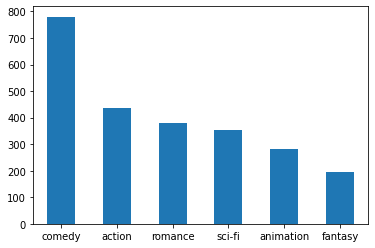

In [16]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('data/tagged_plots_movielens.csv')
df = df.dropna()

print(df.head())
df.tag.value_counts().plot(kind="bar", rot=0)

Szybko dzielimy dane na zbiór uczący i testowy:

In [17]:
train_data, test_data = train_test_split(df, test_size=0.1, random_state=42)

Tokenizujemy dane i wyliczamy reprezentację wektorową (za pomocą zsumowanych wektorów słów wrod2vec):

In [19]:
import nltk
nltk.download('punkt')

test_tokenized = test_data.apply(lambda r: w2v_tokenize_text(r['plot']), axis=1).values
train_tokenized = train_data.apply(lambda r: w2v_tokenize_text(r['plot']), axis=1).values
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

[nltk_data] Downloading package punkt to /home/bartmiki/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Uczymy i testujemy klasyfikator:

In [20]:
logreg = LogisticRegression(n_jobs=1, C=1e5)

logreg = logreg.fit(X_train_word_average, train_data['tag'])
predicted = logreg.predict(X_test_word_average)

/home/bartmiki/Repo/EMD/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Patrzymy jak nam poszło:

In [21]:
print('Trafność klasyfikacji %s' % accuracy_score(test_data.tag, predicted))
cm = confusion_matrix(test_data.tag, predicted)
print('Macierz pomyłek\n %s' % cm)

Trafność klasyfikacji 0.5390946502057613
Macierz pomyłek
 [[23  2 10  0  1  6]
 [ 3 10  8  3  4  3]
 [ 2  5 55  2 18  4]
 [ 3  4  4  4  0  1]
 [ 4  0 12  1 16  2]
 [ 5  0  3  0  2 23]]


Jak na brak porządnego przetwarzania wstępnego, nie jest to zły wynik. Mam nadzieję, że ten przykład pokazał jak można wykorzystać word2vec do tworzenia atrybutów dla problemów klasyfikacyjnych.